In [1]:
from scipy.io import loadmat
import pandas as pd

data_set = loadmat("Liu_dataset.mat")

side_effect = data_set['side_effect']
chemical = data_set['chemical']
Targets = data_set['Targets']
Transporters = data_set['Transporters']
Enzymes = data_set['Enzymes']
Pathways = data_set['Pathways']
Treatment = data_set['Treatment']
Other_side_effects = data_set['Other_side_effects']

side_effect_df = pd.DataFrame(data = side_effect)
chemical_df = pd.DataFrame(data = chemical)
Targets_df = pd.DataFrame(data = Targets)
Transporters_df = pd.DataFrame(data = Transporters)
Enzymes_df = pd.DataFrame(data = Enzymes)
Pathways_df = pd.DataFrame(data = Pathways)
Treatment_df = pd.DataFrame(data = Treatment)

features = pd.concat([chemical_df, Targets_df, Transporters_df, Enzymes_df, Pathways_df, Treatment_df], axis=1)
features.columns=[str(i) for i in range(1, 2893)]
features_array = features.to_numpy()
features_array

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [2]:
from sklearn.decomposition import PCA
pca_breast = PCA(n_components=10)
new_data = pca_breast.fit_transform(features_array)

In [3]:
new_data

array([[ 2.24335922, -3.2437503 ,  0.46437145, ...,  1.71669133,
         0.22103704, -1.75579804],
       [ 0.18304968, -1.58030587, -0.37815572, ..., -1.38221739,
        -0.2251459 ,  0.87339925],
       [ 2.25018572,  1.69200022, -2.77057109, ..., -0.87122987,
         0.31851409, -0.50880025],
       ...,
       [ 3.57095167,  3.60901598, -2.051076  , ..., -0.91235961,
         3.37719219,  0.64645622],
       [-0.50730999, -3.61997413, -1.41489937, ..., -0.81472763,
         1.74282674,  0.75156745],
       [ 1.38824337,  1.66579649, -3.65788045, ...,  3.88454587,
        -0.37305243, -0.01157723]])

In [3]:
count_of_SE = list(side_effect_df.sum(axis = 0))
count_of_SE_df = pd.DataFrame(data = count_of_SE)
count_of_SE_df = count_of_SE_df.T
Count = pd.concat([side_effect_df, count_of_SE_df], axis=0)
#Count
index = 0
count = 0
list_of_index = []
for i in count_of_SE:
    if i>200:
        count+=1
        list_of_index.append(index)
    index+=1
print (count, list_of_index)

81 [2, 19, 27, 35, 36, 49, 51, 53, 63, 67, 74, 84, 150, 176, 177, 179, 189, 224, 227, 229, 240, 241, 250, 274, 285, 295, 300, 309, 311, 344, 346, 369, 375, 380, 417, 427, 429, 447, 458, 463, 471, 508, 587, 600, 608, 615, 649, 651, 653, 663, 664, 688, 698, 734, 782, 797, 809, 826, 829, 842, 844, 847, 861, 873, 883, 892, 902, 919, 934, 938, 942, 953, 962, 967, 1117, 1119, 1249, 1253, 1268, 1346, 1378]


In [4]:
count_of_SE_df

,0,1,2,3,4,5,6,7,8,9,...,1375,1376,1377,1378,1379,1380,1381,1382,1383,1384
0,54,85,457,21,9,2,63,1,61,6,...,21,1,4,305,34,9,7,66,1,1


{'whiskers': [<matplotlib.lines.Line2D at 0x7fbbe66223a0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fbbe6622a60>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fbbe6622040>],
 'medians': [<matplotlib.lines.Line2D at 0x7fbbe662d160>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fbbe662d4c0>],
 'means': []}

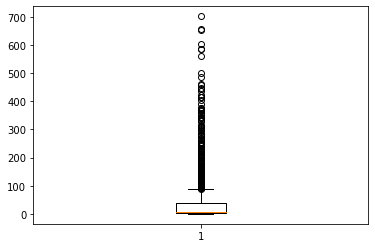

In [6]:
import matplotlib.pyplot as plt
plt.boxplot(count_of_SE, notch=None, vert=None, patch_artist=None, widths=None)

In [7]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [15]:
side_effect_df[8]

0      0
1      0
2      0
3      1
4      0
      ..
827    0
828    0
829    0
830    0
831    0
Name: 8, Length: 832, dtype: uint8

In [19]:
side_effect_1 = side_effect_df[8]
counter = collections.Counter(side_effect_1)
counter
row_ix = where(side_effect_1 == label)[0]
row_ix

array([  3,  11,  20,  30,  31,  41,  50,  54,  60,  61,  76,  77,  87,
        89, 102, 120, 137, 138, 150, 155, 175, 203, 218, 248, 252, 261,
       303, 312, 330, 350, 357, 366, 379, 393, 399, 400, 401, 411, 417,
       425, 427, 477, 515, 527, 549, 565, 575, 589, 590, 602, 613, 616,
       650, 661, 689, 693, 700, 733, 768, 774, 788])

In [24]:
for label, _ in counter.items():
    print (label)

0
1


Counter({0: 771, 1: 61})


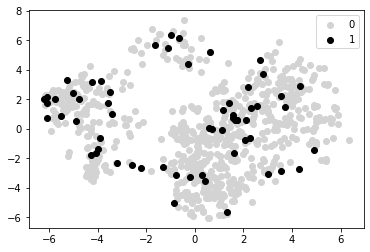

In [33]:
import collections
from collections import Counter
from sklearn.datasets import make_classification
from matplotlib import pyplot
from numpy import where
side_effect_1 = side_effect_df[8]
counter = collections.Counter(side_effect_1)
print(counter)
row_ix = where(side_effect_1 == 0)[0]
pyplot.scatter(new_data[row_ix, 0], new_data[row_ix, 1], label=0, c='lightgray')
row_ix = where(side_effect_1 == 1)[0]
pyplot.scatter(new_data[row_ix, 0], new_data[row_ix, 1], label=1, c='black')
pyplot.legend()
pyplot.show()

Counter({0: 771, 1: 331})


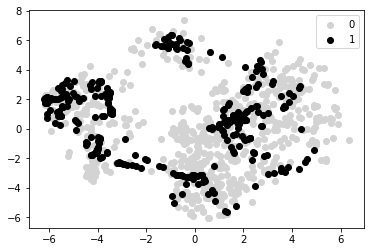

In [40]:
# transform the dataset
from imblearn.over_sampling import SMOTE
oversample = SMOTE(sampling_strategy=0.43)
new_data1, side_effect_11 = oversample.fit_resample(new_data, side_effect_1)
# summarize the new class distribution
counter = Counter(side_effect_11)
print(counter)
# scatter plot of examples by class label
row_ix = where(side_effect_11 == 0)[0]
pyplot.scatter(new_data1[row_ix, 0], new_data1[row_ix, 1], label=0, c='lightgray')
row_ix = where(side_effect_11 == 1)[0]
pyplot.scatter(new_data1[row_ix, 0], new_data1[row_ix, 1], label=1, c='black')
pyplot.legend()
pyplot.show()

In [51]:
side_effect_1_array = side_effect_11.to_numpy()
Accuracy, Precision, Recall = logistic_regression(new_data1, side_effect_1_array)
print (Accuracy, Precision, Recall)

0.6550308008213552 0.6629213483146067 0.6941176470588235


In [55]:
side_effect_1_array = side_effect_1.to_numpy()
Accuracy, Precision, Recall = logistic_regression(new_data, side_effect_1_array)
print (Accuracy, Precision, Recall)

0.96 0.0 0.0


/Users/tom/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
total_averageAccuracy = 0 
total_averagePrecision = 0 
total_averageRecall = 0 
for i in list_of_index:
    side_effect_1 = side_effect_df[i]
    side_effect_1_array = side_effect_1.to_numpy()
    averageAccuracy = 0
    averagePrecision = 0
    averageRecall = 0
    for j in range(1, 101):
        Accuracy, Precision, Recall = logistic_regression(new_data1, side_effect_1_array)
        averageAccuracy += Accuracy
        averagePrecision += Precision
        averageRecall += Recall
    print (averageAccuracy/100, averagePrecision/100, averageRecall/100)
    total_averageAccuracy += averageAccuracy/100
    total_averagePrecision += averagePrecision/100
    total_averageRecall += averageRecall/100
print (total_averageAccuracy/30, total_averagePrecision/30, total_averageRecall/30)

In [13]:
def logistic_regression(features_array, side_effect_1_array):#logistic regression
    from sklearn.model_selection import train_test_split
    X_train,X_test,y_train,y_test=train_test_split(features_array,side_effect_1_array,test_size=0.30)

    from sklearn.linear_model import LogisticRegression

    # instantiate the model (using the default parameters)
    logreg = LogisticRegression()

    # fit the model with data
    logreg.fit(X_train,y_train)

    #
    y_pred=logreg.predict(X_test)

    # import the metrics class
    from sklearn import metrics
    cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
    cnf_matrix

    Accuracy = metrics.accuracy_score(y_test, y_pred)
    Precision = metrics.precision_score(y_test, y_pred)
    Recall = metrics.recall_score(y_test, y_pred)
    
    return Accuracy, Precision, Recall

In [14]:
def svm(features_array, side_effect_1_array):#svm
    from sklearn import svm
    from sklearn.model_selection import train_test_split
    
    X_train,X_test,y_train,y_test=train_test_split(features_array,side_effect_1_array,test_size=0.30)

    #Create a svm Classifier
    clf = svm.SVC(kernel='linear') # Linear Kernel

    #Train the model using the training sets
    clf.fit(X_train, y_train)

    #Predict the response for test dataset
    y_pred = clf.predict(X_test)

    #Import scikit-learn metrics module for accuracy calculation
    from sklearn import metrics

    Accuracy = metrics.accuracy_score(y_test, y_pred)
    Precision = metrics.precision_score(y_test, y_pred)
    Recall = metrics.recall_score(y_test, y_pred)
    
    return Accuracy, Precision, Recall

In [15]:
def knn(features_array, side_effect_1_array):#knn
    from sklearn.model_selection import train_test_split
    from sklearn.preprocessing import StandardScaler
    
    X_train,X_test,y_train,y_test=train_test_split(features_array,side_effect_1_array,test_size=0.30)
    
    scaler = StandardScaler()
    scaler.fit(X_train)

    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)

    from sklearn.neighbors import KNeighborsClassifier
    classifier = KNeighborsClassifier(n_neighbors=3)
    classifier.fit(X_train, y_train)

    y_pred = classifier.predict(X_test)

    #Import scikit-learn metrics module for accuracy calculation
    from sklearn import metrics

    Accuracy = metrics.accuracy_score(y_test, y_pred)
    Precision = metrics.precision_score(y_test, y_pred)
    Recall = metrics.recall_score(y_test, y_pred)
    
    return Accuracy, Precision, Recall

In [16]:
def rf(features_array, side_effect_1_array):#random forest
    from sklearn.model_selection import train_test_split
    from sklearn.preprocessing import StandardScaler
    
    X_train, X_test, y_train, y_test = train_test_split(features_array,side_effect_1_array)
    
    # Import the model we are using
    from sklearn.ensemble import RandomForestClassifier
    # Instantiate and fit the RandomForestClassifier
    forest = RandomForestClassifier(max_depth = 10)
    forest.fit(X_train, y_train)
    
    # Make predictions for the test set
    y_pred = forest.predict(X_test)
    #Import scikit-learn metrics module for accuracy calculation
    from sklearn import metrics

    Accuracy = metrics.accuracy_score(y_test, y_pred)
    Precision = metrics.precision_score(y_test, y_pred)
    Recall = metrics.recall_score(y_test, y_pred)
    
    return Accuracy, Precision, Recall

In [17]:
def GB(features_array, side_effect_1_array):#Gradiant Boost
    from sklearn.model_selection import train_test_split
    from sklearn.preprocessing import StandardScaler
    from sklearn.ensemble import GradientBoostingClassifier
    
    X_train, X_test, y_train, y_test = train_test_split(features_array,side_effect_1_array)
    
    gb_clf = GradientBoostingClassifier(n_estimators=20, max_features=2, max_depth=10)
    gb_clf.fit(X_train, y_train)
    
    # Make predictions for the test set
    y_pred = gb_clf.predict(X_test)
    #Import scikit-learn metrics module for accuracy calculation
    from sklearn import metrics

    Accuracy = metrics.accuracy_score(y_test, y_pred)
    Precision = metrics.precision_score(y_test, y_pred)
    Recall = metrics.recall_score(y_test, y_pred)
    
    return Accuracy, Precision, Recall

In [27]:
total_averageAccuracy = 0 
total_averagePrecision = 0 
total_averageRecall = 0 
for i in list_of_index:
    side_effect_1 = side_effect_df[i]
    side_effect_1_array = side_effect_1.to_numpy()
    averageAccuracy = 0
    averagePrecision = 0
    averageRecall = 0
    for j in range(1, 101):
        Accuracy, Precision, Recall = logistic_regression(new_data, side_effect_1_array)
        averageAccuracy += Accuracy
        averagePrecision += Precision
        averageRecall += Recall
    print (averageAccuracy/100, averagePrecision/100, averageRecall/100)
    total_averageAccuracy += averageAccuracy/100
    total_averagePrecision += averagePrecision/100
    total_averageRecall += averageRecall/100
print (total_averageAccuracy/30, total_averagePrecision/30, total_averageRecall/30)

0.6104799999999999 0.630785479631336 0.7045662028830535
0.75528 0.6460582204881864 0.2856846630981977
0.6050399999999998 0.43565248682989327 0.12765681302356197
0.6802799999999998 0.5689613526011731 0.20151177411248866
0.61836 0.5657017385443655 0.2956552387417021
0.6803599999999999 0.4979569308647619 0.09811893133394597
0.5562800000000001 0.5659428340911387 0.5213948512303722
0.5811199999999996 0.4755212467038923 0.2445258047231046


/Users/tom/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/tom/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/tom/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.6557999999999998 0.39907088775945204 0.04667584731691471
0.6095200000000002 0.5706094818150484 0.37115616216625275
0.5670400000000001 0.5063991681410798 0.2864058393596457
0.6380400000000002 0.5116557968659601 0.1404013735301527
0.598 0.49358541351271873 0.2169952588910123
0.55036 0.49886115662620534 0.3352802297969773


/Users/tom/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/tom/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/tom/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/tom/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:

/Users/tom/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/tom/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/tom/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/tom/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:

0.7265599999999998 0.042261904761904764 0.001219267544006299
0.61248 0.6144758860795512 0.7278570123804097
0.5614399999999998 0.46906642974553003 0.20837002787202635
0.70896 0.7164157539259839 0.9768617287896632
0.7069199999999999 0.7206993968763811 0.9558297529393294
0.60812 0.6184455014067328 0.7178649215647624
0.57464 0.5335956401618085 0.4401281559369905
0.5885600000000001 0.5932223939152659 0.5713456254204246
0.5941200000000001 0.6065381718889483 0.7540786533291876


/Users/tom/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.7218799999999997 0.4242813596605156 0.04423925737584036
0.7209999999999998 0.7273261688821936 0.9852053700097333
0.5849199999999997 0.5626036003986425 0.5383463166269735
0.5994399999999999 0.62275674003229 0.798939857993405
0.6498400000000001 0.4648574305774904 0.1263287534967878


/Users/tom/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/tom/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/tom/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/tom/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:

0.6728800000000001 0.4050322536940183 0.030508711588642944


/Users/tom/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/tom/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/tom/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/tom/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:

0.7192799999999997 0.4282269667467035 0.03537198378827897
0.7826 0.7826640026333113 0.999849126718692


/Users/tom/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.7317999999999992 0.5601280054891241 0.10969953487358852
0.6639999999999999 0.5221017400242942 0.20484204497004557
0.6792799999999999 0.3729818630247591 0.09386251394841326


/Users/tom/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/tom/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/tom/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/tom/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:

0.7428 0.49907611832611826 0.03536951795091822
0.5878800000000002 0.5563016203878967 0.3575674114915895
0.5959199999999997 0.48801156861853073 0.199239019804218
0.5682799999999997 0.5324525659090109 0.3877342138859874
0.62944 0.518282776363817 0.1541256605757291


/Users/tom/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/tom/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/tom/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/tom/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:

0.6943200000000003 0.17689896214896217 0.009924087303667443
0.6865599999999997 0.5359246428069805 0.23860013949818756
0.6159200000000002 0.5916714143424467 0.45100241900177956


/Users/tom/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/tom/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/tom/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/tom/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:

0.7552800000000002 0.5044459739606797 0.037461759838064
0.84484 0.845915681205622 0.9983633943988083
0.6220000000000001 0.4236832160801925 0.13655603847815573
0.7759600000000003 0.5954301051782162 0.261235552038039
0.5782799999999998 0.5995670384919142 0.6025161554848077
0.6337599999999999 0.5208530908375749 0.3733259101637738


/Users/tom/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/tom/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/tom/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/tom/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:

0.7501599999999999 0.409677141485965 0.048059281905016266


/Users/tom/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/tom/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/tom/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/tom/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:

0.7324000000000003 0.43523262848262845 0.034037363427751544
0.5356800000000004 0.5324955281573746 0.4244302237228688


/Users/tom/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/tom/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/tom/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/tom/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:

0.6701599999999999 0.45657069588117977 0.038185641815191594


/Users/tom/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/tom/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/tom/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/tom/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:

0.7440799999999997 0.14674603174603174 0.00980719654727157
0.68084 0.6958994319260721 0.9386629252669221


/Users/tom/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/tom/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/tom/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/tom/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:

/Users/tom/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/tom/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/tom/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/tom/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:

0.6892 0.20611904761904762 0.0074939485010553294


/Users/tom/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/tom/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/tom/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.7132 0.6387685696656286 0.05574529946664198


/Users/tom/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/tom/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/tom/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/tom/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:

0.7125599999999999 0.2968735676088617 0.019140557071561565


/Users/tom/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.7489199999999999 0.42394823232995604 0.09124619990821962


/Users/tom/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/tom/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/tom/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/tom/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:

/Users/tom/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/tom/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/tom/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/tom/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:

0.7577600000000001 0.3575595238095239 0.019063272526533327


/Users/tom/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/tom/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/tom/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/tom/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:

/Users/tom/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/tom/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/tom/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/tom/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:

0.70088 0.15122222222222223 0.007347063720793263
0.5969600000000002 0.49941668508563103 0.26230979255070214
0.5948799999999999 0.5572834943726693 0.47388033471318736
0.6213599999999998 0.6345221946393451 0.5985726434752765
0.6451999999999998 0.4563335833923038 0.11934731314962616
0.6227199999999999 0.4737167467083786 0.2560690110046333


/Users/tom/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/tom/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/tom/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/tom/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:

/Users/tom/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/tom/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/tom/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/tom/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:

0.6971199999999999 0.18864285714285717 0.006057909745809526
0.6150399999999999 0.6448130508411474 0.8055739618098567
0.5906799999999999 0.5155059224484247 0.2326458492912167
0.7922400000000005 0.7952620480934717 0.9938240411512989


/Users/tom/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/tom/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/tom/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/tom/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:

0.75568 0.36541666666666667 0.01459684089097419
0.6136799999999997 0.5612029708046875 0.4964182941484409


/Users/tom/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/tom/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/tom/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/tom/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:

/Users/tom/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/tom/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/tom/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/tom/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:

0.7366400000000002 0.04856547619047619 0.0026799133872264843
0.6972400000000002 0.5234006385407302 0.15220841699061208


/Users/tom/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/tom/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/tom/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/tom/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:

/Users/tom/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/tom/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/tom/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/tom/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:

0.7326799999999998 0.12583333333333332 0.003172834345013564
0.6370799999999999 0.5329258445485382 0.23967616939249659
0.6059599999999999 0.5392097643920448 0.28818708138643184
0.6661199999999997 0.5079364254349986 0.20355434541870476


/Users/tom/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.7325999999999998 0.5002089273385714 0.07539257292599115


/Users/tom/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.7202800000000003 0.4853142200880288 0.07068179788148436
0.54252 0.5367574476256897 0.6115419116648875
0.6183599999999998 0.3970822114001033 0.06185729965724932
1.7838933333333338 1.3394473769693735 0.8367088732049749


In [74]:
total_averageAccuracy = 0 
total_averagePrecision = 0 
total_averageRecall = 0 
for i in list_of_index:
    side_effect_1 = side_effect_df[i]
    side_effect_1_array = side_effect_1.to_numpy()
    averageAccuracy = 0
    averagePrecision = 0
    averageRecall = 0
    for j in range(1, 101):
        Accuracy, Precision, Recall = svm(new_data, side_effect_1_array)
        averageAccuracy += Accuracy
        averagePrecision += Precision
        averageRecall += Recall
    print (averageAccuracy/100, averagePrecision/100, averageRecall/100)
    total_averageAccuracy += averageAccuracy/100
    total_averagePrecision += averagePrecision/100
    total_averageRecall += averageRecall/100
print (total_averageAccuracy/30, total_averagePrecision/30, total_averageRecall/30)

0.60596 0.6254308993077277 0.709753003929236
0.5604799999999996 0.585958432486924 0.461011904432654
0.6219199999999998 0.592899981384463 0.3532155729783357


/Users/tom/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/tom/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/tom/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/tom/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:

0.5757200000000001 0.4831687729075441 0.27742397801258417


/Users/tom/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/tom/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/tom/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/tom/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:

/Users/tom/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/tom/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/tom/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/tom/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:

0.5403600000000001 0.2584093698208789 0.1854304552780388
0.6099199999999998 0.609609343306674 0.7636141635984477


/Users/tom/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/tom/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/tom/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/tom/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:

/Users/tom/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/tom/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/tom/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/tom/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:

/Users/tom/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/tom/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/tom/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/tom/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:

0.56452 0.07974431134756797 0.04603906760607404
0.7094799999999996 0.7094799999999996 1.0
0.7022399999999999 0.7022399999999999 1.0
0.6157199999999999 0.6190461462019392 0.7687975524078496


/Users/tom/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.5569199999999997 0.5118711207388356 0.407114626662204
0.5727599999999997 0.5821254174372331 0.5460925965349778
0.58508 0.5996199279167308 0.7486729314591949
0.7275999999999998 0.7275999999999998 1.0
0.5741199999999999 0.5540608352419931 0.5370404371300572
0.5812399999999998 0.6000763868187816 0.8902644305335268
0.7850800000000001 0.7850800000000001 1.0
0.5734400000000001 0.5406643628095759 0.29349502960391366


/Users/tom/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.55956 0.5262586902545938 0.32429490380387976
0.6115600000000001 0.601101793192044 0.38230963424614933
0.8450000000000002 0.8450000000000002 1.0
0.57612 0.6036996725950086 0.5738739446424724
0.5391200000000002 0.5417910767413162 0.40346252412782924
0.6750399999999996 0.6750399999999996 1.0
0.5967599999999996 0.5569742498852093 0.5098418753416422
0.6076799999999999 0.6172371615589778 0.5634099069981235
0.59908 0.6259412954621305 0.8413554702657681
0.7899600000000006 0.7899600000000006 1.0
0.6065999999999999 0.5530511740764649 0.4891014187509686
0.5587200000000001 0.54498893865444 0.7131137964151509
0.6209253333333333 0.5882709786715684 0.626290974158636


In [76]:
total_averageAccuracy = 0 
total_averagePrecision = 0 
total_averageRecall = 0 
for i in list_of_index:
    side_effect_1 = side_effect_df[i]
    side_effect_1_array = side_effect_1.to_numpy()
    averageAccuracy = 0
    averagePrecision = 0
    averageRecall = 0
    for j in range(1, 101):
        Accuracy, Precision, Recall = knn(new_data, side_effect_1_array)
        averageAccuracy += Accuracy
        averagePrecision += Precision
        averageRecall += Recall
    print (averageAccuracy/100, averagePrecision/100, averageRecall/100)
    total_averageAccuracy += averageAccuracy/100
    total_averagePrecision += averagePrecision/100
    total_averageRecall += averageRecall/100
print (total_averageAccuracy/30, total_averagePrecision/30, total_averageRecall/30)

0.5754799999999998 0.61552523422687 0.6125845007528729
0.57056 0.5825159641985725 0.5670598928085149
0.5849199999999999 0.5125872592360627 0.471282462653975
0.57264 0.5105064955166799 0.4647234999121882
0.5565199999999999 0.5038081040031492 0.48857480288617
0.6178400000000001 0.6410716598728337 0.6378614773326374
0.5695599999999998 0.48911085623461453 0.44178312482164983
0.69624 0.7665528279410709 0.8172489657565586
0.6653599999999998 0.7378998909881177 0.8115535600212462
0.6089199999999997 0.630727795480136 0.6557578927194331
0.5593999999999997 0.511897221947522 0.4729553746038333
0.5924400000000002 0.5938772216609576 0.5814107122638666
0.5819599999999997 0.6217548185011492 0.633191759113901
0.6629999999999996 0.7447113986561976 0.8163483255459043
0.5737599999999997 0.5520134094392761 0.5251986287761117
0.5634000000000001 0.6190319154813978 0.6501626221751793
0.7513599999999998 0.8050191997929013 0.9024928883263773
0.5527599999999997 0.49361599528431677 0.4209889772957562
0.5569199999

In [84]:
total_averageAccuracy = 0 
total_averagePrecision = 0 
total_averageRecall = 0 
for i in list_of_index:
    side_effect_1 = side_effect_df[i]
    side_effect_1_array = side_effect_1.to_numpy()
    averageAccuracy = 0
    averagePrecision = 0
    averageRecall = 0
    for j in range(1, 101):
        Accuracy, Precision, Recall = rf(new_data, side_effect_1_array)
        averageAccuracy += Accuracy
        averagePrecision += Precision
        averageRecall += Recall
    print (averageAccuracy/100, averagePrecision/100, averageRecall/100)
    total_averageAccuracy += averageAccuracy/100
    total_averagePrecision += averagePrecision/100
    total_averageRecall += averageRecall/100
print (total_averageAccuracy/30, total_averagePrecision/30, total_averageRecall/30)

0.602644230769231 0.6236961273574527 0.702183147015775
0.5950961538461536 0.5941669666627757 0.6278367161958527
0.6294711538461538 0.5869248695926446 0.4653156524750441
0.591971153846154 0.535309475236527 0.4098300428855178
0.567019230769231 0.5132972453037541 0.42430101141220433
0.6409134615384615 0.6421092960645808 0.7465382776099162
0.5659134615384613 0.48726742716781013 0.3465690903359345
0.7168269230769228 0.7367558375035023 0.9313498396101372
0.7123076923076923 0.7335590482280299 0.9248119369146198
0.6396153846153846 0.6403199039601237 0.7523746914785011
0.5824999999999999 0.5460629114769171 0.5011955969752884
0.6094230769230766 0.6073269279863436 0.6115122439648857
0.5910096153846154 0.6160452640238148 0.7220742575951208
0.7128365384615385 0.7353588196981642 0.9427026836128296
0.5862019230769229 0.5652521999539415 0.5369733400982689
0.5953365384615387 0.6297891166055044 0.7597672268643688
0.7836057692307691 0.7997290330129657 0.967169500104383
0.5728846153846154 0.51923493755678

In [90]:
total_averageAccuracy = 0 
total_averagePrecision = 0 
total_averageRecall = 0 
for i in list_of_index:
    side_effect_1 = side_effect_df[i]
    side_effect_1_array = side_effect_1.to_numpy()
    averageAccuracy = 0
    averagePrecision = 0
    averageRecall = 0
    for j in range(1, 101):
        Accuracy, Precision, Recall = GB(new_data, side_effect_1_array)
        averageAccuracy += Accuracy
        averagePrecision += Precision
        averageRecall += Recall
    print (averageAccuracy/100, averagePrecision/100, averageRecall/100)
    total_averageAccuracy += averageAccuracy/100
    total_averagePrecision += averagePrecision/100
    total_averageRecall += averageRecall/100
print (total_averageAccuracy/30, total_averagePrecision/30, total_averageRecall/30)

0.5924999999999999 0.6185920416393925 0.6796660194997686
0.588269230769231 0.5895086609057865 0.6078623747854836
0.6207211538461538 0.5599558408156031 0.4714135822577763
0.571923076923077 0.51592114869384 0.40720252001055185
0.5572596153846154 0.5033026591903673 0.42826400933968606
0.6236057692307694 0.6273949298608484 0.7077434683031119
0.5561057692307692 0.47718299215325344 0.3626817279736018
0.7085576923076922 0.7370597659260925 0.9106308159540258
0.703894230769231 0.7312256343548078 0.9122438458985859
0.6167307692307692 0.6299600218697187 0.7054543198768024
0.5612980769230768 0.5200828925688742 0.47811899433920396
0.6036538461538463 0.5976484076522124 0.6106580294667537
0.5778846153846154 0.6073788928235012 0.6856593332208574
0.7011057692307696 0.7378345357927804 0.9127579727994075
0.5718269230769231 0.5427949470462103 0.5212006082745371
0.5803846153846155 0.6200422551647009 0.7372464111252378
0.7716826923076922 0.7953609048090448 0.954225742569527
0.5640384615384615 0.510331959791

In [58]:
count = 0
for i in side_effect_df[67]:
    if i == 1:
        count += 1
print (count)

355


In [34]:
drug_to_Tg_matrix = pd.DataFrame(columns=['drug', 'Tg'])
#create a matrix of drugs-to-targets
#two columns: drugs labeled 0-831, SE labeled Tg1-Tg786
Targets_df.columns=["Tg"+str(i) for i in range(1, 787)]
for i in range (1, 787):
    column = 'Tg'+str(i)
    count = 0
    for j in Targets_df[column]:
        if j == 1:
            add = pd.DataFrame({'drug':[count], 'Tg':[column]})
            drug_to_Tg_matrix = pd.concat([drug_to_Tg_matrix, add], axis=0)
        count += 1

In [35]:
drug_to_Tg_matrix

,drug,Tg
0,190,Tg1
0,247,Tg1
0,374,Tg1
0,675,Tg1
0,814,Tg1
...,...,...
0,657,Tg783
0,795,Tg783
0,383,Tg784
0,520,Tg785


In [145]:
import networkx as nx
from networkx.algorithms import bipartite
from networkx.algorithms import centrality
from networkx.algorithms import distance_measures
from networkx.algorithms import shortest_paths
from networkx.algorithms import components
from networkx.algorithms import isolates
from networkx.classes import function
import matplotlib.pyplot as plt
import math
import csv
import pandas as pd
import networkx as nx

import pandas
drug_to_SE_matrix = pandas.read_csv('drug_to_SE_matrix.csv')
drug_to_SE_matrix = drug_to_SE_matrix.drop(['Unnamed: 0'], axis = 1)

G_drug_Tg = nx.Graph()
G_drug_Tg.add_nodes_from(drug_to_SE_matrix['drug'], bipartite='drug')
G_drug_Tg.add_nodes_from(drug_to_Tg_matrix['Tg'], bipartite='Tg')
G_drug_Tg.add_edges_from(zip(drug_to_Tg_matrix['drug'], drug_to_Tg_matrix['Tg'])) 
N, K = G_drug_Tg.order(), G_drug_Tg.size()
avg_deg = float(K) / N
print ("Nodes: ", N)
print ("Edges: ", K)
print ("Average degree: ", avg_deg)
drug_nodes = [n for n in G_drug_Tg.nodes() if G_drug_Tg.nodes[n]['bipartite'] == 'drug'] 
Tg_nodes = [n for n in G_drug_Tg.nodes() if G_drug_Tg.nodes[n]['bipartite'] == 'Tg'] 
G_drug_on_Tg = nx.algorithms.bipartite.projection.weighted_projected_graph(G_drug_Tg, drug_nodes)
N, K = G_drug_on_Tg.order(), G_drug_on_Tg.size()
avg_deg = float(K) / N
print ("Nodes: ", N)
print ("Edges: ", K)
print ("Average degree: ", avg_deg)

Nodes:  1617
Edges:  2860
Average degree:  1.7687074829931972
Nodes:  832
Edges:  9967
Average degree:  11.979567307692308


In [147]:
drug_to_SE_matrix

,drug,SE
0,7,SE1
1,30,SE1
2,33,SE1
3,35,SE1
4,39,SE1
...,...,...
59200,749,SE1383
59201,773,SE1383
59202,776,SE1383
59203,542,SE1384


In [136]:
degree_centrality = nx.algorithms.centrality.degree_centrality(G_drug_on_Tg)
degree_centrality_sorted = {key:degree_centrality[key] for key in sorted(d.keys())}
degree_centrality_sorted_value = degree_centrality_sorted.values()
degree_centrality_sorted_value = list(degree_centrality_sorted_value)

eigenvector_centrality = nx.eigenvector_centrality(G_drug_on_Tg)
eigenvector_centrality_sorted = {key:eigenvector_centrality[key] for key in sorted(d.keys())}
eigenvector_centrality_sorted_value = eigenvector_centrality_sorted.values()
eigenvector_centrality_sorted_value = list(eigenvector_centrality_sorted_value)

closeness_centrality = nx.algorithms.centrality.closeness_centrality(G_drug_on_Tg)
closeness_centrality_sorted = {key:closeness_centrality[key] for key in sorted(d.keys())}
closeness_centrality_sorted_value = closeness_centrality_sorted.values()
closeness_centrality_sorted_value = list(closeness_centrality_sorted_value)

clustering = nx.algorithms.cluster.clustering(G_drug_on_Tg)
clustering_sorted = {key:clustering[key] for key in sorted(d.keys())}
clustering_sorted_value = clustering_sorted.values()
clustering_sorted_value = list(clustering_sorted_value)

from sklearn import preprocessing
standardised_degree_centrality = preprocessing.scale(degree_centrality_sorted_value)
standardised_eigenvector_centrality = preprocessing.scale(eigenvector_centrality_sorted_value)
standardised_closeness_centrality = preprocessing.scale(closeness_centrality_sorted_value)
standardised_clustering = preprocessing.scale(clustering_sorted_value)

In [138]:
fewturs_centrality = pd.DataFrame(data=new_data)
fewturs_centrality['degree_centrality'] = list(standardised_degree_centrality)
fewturs_centrality['eigenvector_centrality'] = list(standardised_eigenvector_centrality)
fewturs_centrality['closeness_centrality'] = list(standardised_closeness_centrality)
fewturs_centrality['clustering'] = list(standardised_clustering)

In [139]:
fewturs_centrality

,0,1,2,3,4,5,6,7,8,9,degree_centrality,eigenvector_centrality,closeness_centrality,clustering
0,2.243359,-3.243750,0.464371,-0.784687,2.527044,0.004711,1.159011,1.712082,0.219022,-1.751452,-0.584568,-0.483886,-1.692631,0.801099
1,0.183050,-1.580306,-0.378156,-0.468512,3.314520,-1.100066,1.758180,-1.382236,-0.224620,0.875905,-0.511310,-0.483878,-0.215690,0.801099
2,2.250186,1.692000,-2.770571,0.813532,0.960952,-0.955286,-1.495121,-0.870797,0.321100,-0.507886,0.404416,-0.334347,0.665193,0.166934
3,-1.099856,5.468633,4.742379,-0.996103,-0.248944,0.068355,0.560030,-1.392607,1.108006,-0.225610,-0.511310,-0.483355,0.025951,0.318505
4,-0.373342,-3.386503,-0.653787,0.375010,-0.013749,0.091721,1.577579,-1.227321,-0.539296,1.658757,0.880594,1.354206,0.786307,0.647080
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
827,-0.573835,-3.580396,-0.987106,-1.924039,-2.584529,2.174728,-0.346536,-0.355681,-0.294225,0.785679,-0.840971,-0.483886,-0.628781,-1.913493
828,2.867740,-2.913638,0.912123,0.205155,1.212407,-0.735323,-2.484220,-0.194830,0.367233,-1.747799,1.356772,-0.465632,0.575983,0.127643
829,3.570952,3.609016,-2.051076,1.711574,-2.500304,-0.340408,1.092383,-0.912133,3.380501,0.648234,0.294529,-0.337663,0.613409,0.543870
830,-0.507310,-3.619974,-1.414899,2.320927,-0.723548,1.959146,-0.222071,-0.815853,1.742005,0.749024,-0.840971,-0.483830,0.101987,-1.913493


In [140]:
total_averageAccuracy = 0 
total_averagePrecision = 0 
total_averageRecall = 0 
for i in list_of_index:
    side_effect_1 = side_effect_df[i]
    side_effect_1_array = side_effect_1.to_numpy()
    averageAccuracy = 0
    averagePrecision = 0
    averageRecall = 0
    for j in range(1, 101):
        Accuracy, Precision, Recall = GB(fewturs_centrality, side_effect_1_array)
        averageAccuracy += Accuracy
        averagePrecision += Precision
        averageRecall += Recall
    print (averageAccuracy/100, averagePrecision/100, averageRecall/100)
    total_averageAccuracy += averageAccuracy/100
    total_averagePrecision += averagePrecision/100
    total_averageRecall += averageRecall/100
print (total_averageAccuracy/30, total_averagePrecision/30, total_averageRecall/30)

0.6039423076923078 0.6291785661310081 0.6904773154128975
0.5964903846153846 0.6052851147501594 0.6057754683193846
0.6358173076923079 0.5948350282264722 0.4766046974699221
0.5971153846153846 0.5385560349067281 0.4449682754196989
0.6050480769230769 0.5656884493694883 0.48301933307503836
0.6477403846153846 0.6550316695981959 0.7175189523576501
0.5675480769230766 0.4908266105714496 0.36919157509370265
0.723076923076923 0.7500070010555301 0.9155230207215245
0.7184615384615387 0.7471195928891703 0.9118517424402781
0.6505769230769228 0.6678954312482849 0.7025646127661337
0.5829326923076923 0.5497242037981711 0.4892177349025531
0.611730769230769 0.6126573730404679 0.6161765975127725
0.5922596153846157 0.6191700436245953 0.6968375054244931
0.7047596153846155 0.7380099704715591 0.9187826504708115
0.6038942307692308 0.5885157565334079 0.5377448446964196
0.6000480769230773 0.6339417497002414 0.7514402192367116
0.7683653846153848 0.7905845985870203 0.9579641514155091
0.5735576923076924 0.5102049031

In [141]:
total_averageAccuracy = 0 
total_averagePrecision = 0 
total_averageRecall = 0 
for i in list_of_index:
    side_effect_1 = side_effect_df[i]
    side_effect_1_array = side_effect_1.to_numpy()
    averageAccuracy = 0
    averagePrecision = 0
    averageRecall = 0
    for j in range(1, 101):
        Accuracy, Precision, Recall = logistic_regression(fewturs_centrality, side_effect_1_array)
        averageAccuracy += Accuracy
        averagePrecision += Precision
        averageRecall += Recall
    print (averageAccuracy/100, averagePrecision/100, averageRecall/100)
    total_averageAccuracy += averageAccuracy/100
    total_averagePrecision += averagePrecision/100
    total_averageRecall += averageRecall/100
print (total_averageAccuracy/30, total_averagePrecision/30, total_averageRecall/30)

0.6030799999999998 0.6230211879001648 0.6995384125832657
0.5540399999999999 0.5605503686044832 0.5498264669747701
0.6060799999999998 0.5648327036245887 0.37089898951375205
0.5777599999999999 0.5234688070959781 0.3534266365606749
0.5918399999999998 0.5539148942134191 0.4262309591467786
0.6234399999999996 0.6371238612957943 0.6855731431014526
0.55828 0.4606162309575857 0.2556102883552307
0.7034 0.7163295497857299 0.9622377158509207
0.7015600000000001 0.7195970981612261 0.9393949070598915
0.6235999999999999 0.6501883444307234 0.6827778001184748
0.5724399999999997 0.5435406358313051 0.4334049296473407
0.5905999999999998 0.5946127346926684 0.5808501001483198
0.5877199999999996 0.6109430678132238 0.7200931041907599
0.7210399999999997 0.7279585743313113 0.9834272140541068
0.5908399999999998 0.570470525471705 0.5485891648621214
0.6124399999999999 0.6390756412233086 0.7867840660214013
0.7815200000000001 0.7856832782503136 0.9927975794372594
0.5892799999999999 0.5416555202241611 0.39392528835486

In [148]:
import pandas
drug_to_SE_matrix = pandas.read_csv('drug_to_SE_matrix.csv')
drug_to_SE_matrix = drug_to_SE_matrix.drop(['Unnamed: 0'], axis = 1)

G_drug_SE = nx.Graph()
G_drug_SE.add_nodes_from(drug_to_SE_matrix['drug'], bipartite='drug')
G_drug_SE.add_nodes_from(drug_to_SE_matrix['SE'], bipartite='SE')
G_drug_SE.add_edges_from(zip(drug_to_SE_matrix['drug'], drug_to_SE_matrix['SE'])) 
N, K = G_drug_SE.order(), G_drug_SE.size()
avg_deg = float(K) / N
print ("Nodes: ", N)
print ("Edges: ", K)
print ("Average degree: ", avg_deg)
drug_nodes = [n for n in G_drug_SE.nodes() if G_drug_SE.nodes[n]['bipartite'] == 'drug'] 
SE_nodes = [n for n in G_drug_SE.nodes() if G_drug_SE.nodes[n]['bipartite'] == 'SE'] 
G_drug_on_SE = nx.algorithms.bipartite.projection.weighted_projected_graph(G_drug_SE, drug_nodes)
N, K = G_drug_on_SE.order(), G_drug_on_SE.size()
avg_deg = float(K) / N
print ("Nodes: ", N)
print ("Edges: ", K)
print ("Average degree: ", avg_deg)

Nodes:  2213
Edges:  59205
Average degree:  26.75327609579756
Nodes:  832
Edges:  332806
Average degree:  400.00721153846155


In [149]:
degree_centrality = nx.algorithms.centrality.degree_centrality(G_drug_on_SE)
degree_centrality_sorted = {key:degree_centrality[key] for key in sorted(d.keys())}
degree_centrality_sorted_value = degree_centrality_sorted.values()
degree_centrality_sorted_value = list(degree_centrality_sorted_value)

eigenvector_centrality = nx.eigenvector_centrality(G_drug_on_SE)
eigenvector_centrality_sorted = {key:eigenvector_centrality[key] for key in sorted(d.keys())}
eigenvector_centrality_sorted_value = eigenvector_centrality_sorted.values()
eigenvector_centrality_sorted_value = list(eigenvector_centrality_sorted_value)

closeness_centrality = nx.algorithms.centrality.closeness_centrality(G_drug_on_SE)
closeness_centrality_sorted = {key:closeness_centrality[key] for key in sorted(d.keys())}
closeness_centrality_sorted_value = closeness_centrality_sorted.values()
closeness_centrality_sorted_value = list(closeness_centrality_sorted_value)

clustering = nx.algorithms.cluster.clustering(G_drug_on_SE)
clustering_sorted = {key:clustering[key] for key in sorted(d.keys())}
clustering_sorted_value = clustering_sorted.values()
clustering_sorted_value = list(clustering_sorted_value)

from sklearn import preprocessing
standardised_degree_centrality = preprocessing.scale(degree_centrality_sorted_value)
standardised_eigenvector_centrality = preprocessing.scale(eigenvector_centrality_sorted_value)
standardised_closeness_centrality = preprocessing.scale(closeness_centrality_sorted_value)
standardised_clustering = preprocessing.scale(clustering_sorted_value)

In [150]:
fewturs_centrality = pd.DataFrame(data=new_data)
fewturs_centrality['degree_centrality'] = list(standardised_degree_centrality)
fewturs_centrality['eigenvector_centrality'] = list(standardised_eigenvector_centrality)
fewturs_centrality['closeness_centrality'] = list(standardised_closeness_centrality)
fewturs_centrality['clustering'] = list(standardised_clustering)
fewturs_centrality

,0,1,2,3,4,5,6,7,8,9,degree_centrality,eigenvector_centrality,closeness_centrality,clustering
0,2.243359,-3.243750,0.464371,-0.784687,2.527044,0.004711,1.159011,1.712082,0.219022,-1.751452,0.340921,0.311864,0.429193,-0.795379
1,0.183050,-1.580306,-0.378156,-0.468512,3.314520,-1.100066,1.758180,-1.382236,-0.224620,0.875905,0.340921,0.308296,0.429193,-0.873274
2,2.250186,1.692000,-2.770571,0.813532,0.960952,-0.955286,-1.495121,-0.870797,0.321100,-0.507886,-0.027486,0.021190,-0.123425,1.090533
3,-1.099856,5.468633,4.742379,-0.996103,-0.248944,0.068355,0.560030,-1.392607,1.108006,-0.225610,0.177185,0.205140,0.179245,0.513447
4,-0.373342,-3.386503,-0.653787,0.375010,-0.013749,0.091721,1.577579,-1.227321,-0.539296,1.658757,0.245408,0.224339,0.282526,-0.584269
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
827,-0.573835,-3.580396,-0.987106,-1.924039,-2.584529,2.174728,-0.346536,-0.355681,-0.294225,0.785679,-10.029073,-10.214254,-7.986383,-0.514402
828,2.867740,-2.913638,0.912123,0.205155,1.212407,-0.735323,-2.484220,-0.194830,0.367233,-1.747799,0.368211,0.325721,0.471549,-1.095871
829,3.570952,3.609016,-2.051076,1.711574,-2.500304,-0.340408,1.092383,-0.912133,3.380501,0.648234,0.190829,0.207078,0.199804,0.251947
830,-0.507310,-3.619974,-1.414899,2.320927,-0.723548,1.959146,-0.222071,-0.815853,1.742005,0.749024,0.272698,0.278656,0.324182,-0.009867


In [151]:
total_averageAccuracy = 0 
total_averagePrecision = 0 
total_averageRecall = 0 
for i in list_of_index:
    side_effect_1 = side_effect_df[i]
    side_effect_1_array = side_effect_1.to_numpy()
    averageAccuracy = 0
    averagePrecision = 0
    averageRecall = 0
    for j in range(1, 101):
        Accuracy, Precision, Recall = logistic_regression(fewturs_centrality, side_effect_1_array)
        averageAccuracy += Accuracy
        averagePrecision += Precision
        averageRecall += Recall
    print (averageAccuracy/100, averagePrecision/100, averageRecall/100)
    total_averageAccuracy += averageAccuracy/100
    total_averagePrecision += averagePrecision/100
    total_averageRecall += averageRecall/100
print (total_averageAccuracy/30, total_averagePrecision/30, total_averageRecall/30)

0.7659600000000001 0.7606684649530547 0.8383293219206773
0.7326800000000001 0.7142604659574485 0.7898250317900175
0.7722399999999999 0.7300228236305171 0.7476848674834399
0.7784000000000006 0.7405012936195818 0.7548975023710479
0.7272799999999999 0.6845630671870007 0.7089042643262153
0.7650800000000001 0.7496703442850108 0.8332025288727851
0.7600800000000001 0.7166778900283635 0.7236799679913902
0.8051599999999998 0.8098460502519044 0.9460797018089222
0.8176799999999997 0.8225082483800185 0.9452743163227788
0.7478400000000001 0.7474343416671292 0.7976818265643318
0.7644399999999999 0.7301464365681691 0.7655691445541829
0.77468 0.7621847577449656 0.7949697877187626
0.7839600000000001 0.7959544306922911 0.8245186641524306
0.8159999999999998 0.8323360672319644 0.9333825538304752
0.7355200000000001 0.7091308677148089 0.7454500481489101
0.7643600000000006 0.7611387157922164 0.8729777820715304
0.8705200000000001 0.8747378195177912 0.9757218156315637
0.63548 0.5905952192072784 0.5570538340926

In [152]:
total_averageAccuracy = 0 
total_averagePrecision = 0 
total_averageRecall = 0 
for i in list_of_index:
    side_effect_1 = side_effect_df[i]
    side_effect_1_array = side_effect_1.to_numpy()
    averageAccuracy = 0
    averagePrecision = 0
    averageRecall = 0
    for j in range(1, 101):
        Accuracy, Precision, Recall = svm(fewturs_centrality, side_effect_1_array)
        averageAccuracy += Accuracy
        averagePrecision += Precision
        averageRecall += Recall
    print (averageAccuracy/100, averagePrecision/100, averageRecall/100)
    total_averageAccuracy += averageAccuracy/100
    total_averagePrecision += averagePrecision/100
    total_averageRecall += averageRecall/100
print (total_averageAccuracy/30, total_averagePrecision/30, total_averageRecall/30)

0.7686800000000003 0.7567049735724056 0.8512002618005599
0.7317999999999998 0.7242844390101734 0.7665879494605886
0.7774800000000001 0.7362949321036187 0.7397066128495028
0.7780000000000004 0.7503976692835033 0.7422479274006668
0.7299999999999994 0.6916530051229337 0.707040541579171
0.7703999999999996 0.7675882320816727 0.823950179484012
0.7670800000000001 0.7294310533643282 0.7192009050788947
0.8131999999999999 0.8080400472783265 0.9656996862457023
0.8194000000000001 0.811847443995188 0.967584136676317
0.7531599999999998 0.7544993092789598 0.8042739226360558
0.7656800000000002 0.7384177354836217 0.7517269997599567
0.7733200000000008 0.7652802005175596 0.7902970771162201
0.7860400000000002 0.7979639739847486 0.8232248466418042
0.811 0.8190458631751438 0.9482944672539262
0.7346400000000002 0.7020749860286437 0.7606288619170845
0.7609600000000002 0.7455604521974425 0.9032387575252363
0.87076 0.8685525973851831 0.9840292679518607
0.6455200000000001 0.6054329286407357 0.5837290309825602
0.

In [153]:
total_averageAccuracy = 0 
total_averagePrecision = 0 
total_averageRecall = 0 
for i in list_of_index:
    side_effect_1 = side_effect_df[i]
    side_effect_1_array = side_effect_1.to_numpy()
    averageAccuracy = 0
    averagePrecision = 0
    averageRecall = 0
    for j in range(1, 101):
        Accuracy, Precision, Recall = knn(fewturs_centrality, side_effect_1_array)
        averageAccuracy += Accuracy
        averagePrecision += Precision
        averageRecall += Recall
    print (averageAccuracy/100, averagePrecision/100, averageRecall/100)
    total_averageAccuracy += averageAccuracy/100
    total_averagePrecision += averagePrecision/100
    total_averageRecall += averageRecall/100
print (total_averageAccuracy/30, total_averagePrecision/30, total_averageRecall/30)

0.6841599999999997 0.6984311876386728 0.7416483634938648
0.66416 0.6636149716505532 0.6808034931259508
0.6926799999999996 0.6422135714215039 0.6430130794295
0.69636 0.6516486671919991 0.6481140976950945
0.6581599999999999 0.6139589796660817 0.6171356907323107
0.7307199999999997 0.7351824807511183 0.7729475263869778
0.6878399999999999 0.6366915116347005 0.6093118030404745
0.7835600000000003 0.8203272649938402 0.8878685872577455
0.7731600000000001 0.8016630308496202 0.9024632938700884
0.6770400000000001 0.682947717978942 0.7440000997788044
0.6816400000000001 0.6455577330652534 0.6538088939245417
0.6967999999999998 0.6882230318470494 0.7186190162502771
0.7093599999999999 0.7226972399097502 0.7737889011322931
0.75992 0.8023611931455317 0.8867604596615452
0.6657599999999999 0.6365698833025869 0.6658240148474909
0.7048800000000002 0.7296158042494078 0.7910586817864149
0.8293599999999999 0.8518257299345854 0.9484528491374271
0.6005599999999996 0.5470780668648318 0.5315091445674175
0.58828 0.5

In [154]:
total_averageAccuracy = 0 
total_averagePrecision = 0 
total_averageRecall = 0 
for i in list_of_index:
    side_effect_1 = side_effect_df[i]
    side_effect_1_array = side_effect_1.to_numpy()
    averageAccuracy = 0
    averagePrecision = 0
    averageRecall = 0
    for j in range(1, 101):
        Accuracy, Precision, Recall = rf(fewturs_centrality, side_effect_1_array)
        averageAccuracy += Accuracy
        averagePrecision += Precision
        averageRecall += Recall
    print (averageAccuracy/100, averagePrecision/100, averageRecall/100)
    total_averageAccuracy += averageAccuracy/100
    total_averagePrecision += averagePrecision/100
    total_averageRecall += averageRecall/100
print (total_averageAccuracy/30, total_averagePrecision/30, total_averageRecall/30)

0.7662500000000001 0.7729664954109744 0.815210667025973
0.7525961538461539 0.7558269481526301 0.7587301621322592
0.7806730769230774 0.7590837778206847 0.7155658207265638
0.7839903846153851 0.7596825108704749 0.7294457236965621
0.7387980769230768 0.7260816122603028 0.6621950087565075
0.793269230769231 0.8138616992660818 0.7978705938337053
0.762644230769231 0.7282379818427485 0.6968922698586821
0.8171153846153846 0.8318933394289999 0.9291596501855218
0.8211538461538459 0.8339760657391123 0.9310883763228252
0.7556730769230772 0.7628605207011825 0.7928611531441073
0.7654807692307692 0.739413256576476 0.7431994632150797
0.7779807692307696 0.7743195822479042 0.7839426795754298
0.7747596153846158 0.7964948942078256 0.7984509470165695
0.8166826923076926 0.8512839155772473 0.9050714314208871
0.7410576923076927 0.7081383689821628 0.7552344709770297
0.7820192307692311 0.7944899183659022 0.848883262784554
0.869278846153846 0.8825318691889832 0.961922381172204
0.6287019230769232 0.5757268207498548 

In [155]:
total_averageAccuracy = 0 
total_averagePrecision = 0 
total_averageRecall = 0 
for i in list_of_index:
    side_effect_1 = side_effect_df[i]
    side_effect_1_array = side_effect_1.to_numpy()
    averageAccuracy = 0
    averagePrecision = 0
    averageRecall = 0
    for j in range(1, 101):
        Accuracy, Precision, Recall = GB(fewturs_centrality, side_effect_1_array)
        averageAccuracy += Accuracy
        averagePrecision += Precision
        averageRecall += Recall
    print (averageAccuracy/100, averagePrecision/100, averageRecall/100)
    total_averageAccuracy += averageAccuracy/100
    total_averagePrecision += averagePrecision/100
    total_averageRecall += averageRecall/100
print (total_averageAccuracy/30, total_averagePrecision/30, total_averageRecall/30)

0.7510096153846157 0.756457507969027 0.8035240488600647
0.7353365384615386 0.7385124517769516 0.7423324936821831
0.7669711538461536 0.7451044861059601 0.6927798830301997
0.7742788461538461 0.7553983364266625 0.7073793335335865
0.7210576923076922 0.697636095485135 0.6465912597695826
0.7893269230769233 0.7959361894404523 0.8115269013037554
0.746201923076923 0.7130516476094545 0.6688059427332567
0.8136057692307691 0.8238954147232949 0.9363251033111908
0.814375 0.8264058891226146 0.9334881068984935
0.740528846153846 0.7489950050658348 0.7798746226119668
0.7565384615384616 0.7403908945977126 0.7225425471777966
0.7707211538461541 0.7697848159780781 0.7738519383305679
0.7735096153846155 0.7933073191639848 0.8037578415856594
0.8084134615384613 0.8362660255702608 0.9176238250457976
0.7260096153846155 0.7027302586852403 0.717672496140701
0.7704807692307692 0.7810001636299546 0.8479870587192128
0.8604326923076921 0.873173934706784 0.9620096751693156
0.6112019230769231 0.5590764501437253 0.5182869